# Performing EDA and Visualizing the insights and model evaluation of Titanic dataset.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Cleaning the dataset and deriving few insights is the main agenda here


# Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Titanic_dataset.csv')

# Checking the spread of data in top and bottom

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


Inference: Top and bottom has the passengers data who are mid aged and there are many missing values which needs to be handled

# Size of dataset

In [5]:
df.shape

(891, 12)

Observation: Dataset has 891 observations/Passenger with 12 attributes/details

# Data types info and statistical analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#### Observation: The least age of people who travelled in Titanic is less than a year old and maximum is 80. 50% of the people who travelled where less than 28 years old. The Fare/Price of ticket ranges from 0 to 512 based on travelling class

# Checking for null values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Survived         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

#### Inference: We have infromation of Passengers class travelled but not their ages or cabin chosen. Embarkment is also missing for 2 passengers

# Dropping the columns which are not contributing for prediction

In [9]:
df.drop(['Name','Embarked','Ticket', 'PassengerId'], axis=1, inplace= True)

In [10]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived
0,3,male,22.0,1,0,7.2500,NaN,0
1,1,female,38.0,1,0,71.2833,C85,1
2,3,female,26.0,0,0,7.9250,NaN,1
3,1,female,35.0,1,0,53.1000,C123,1
4,3,male,35.0,0,0,8.0500,NaN,0


# Handling missing values

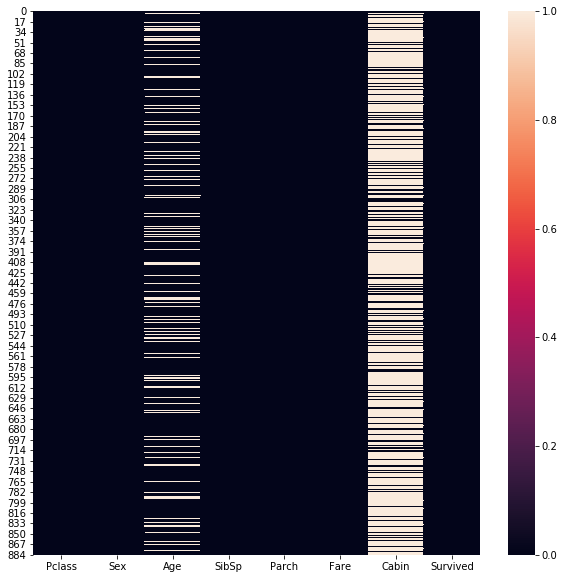

In [11]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull())

In [12]:
(df.isnull().sum()/df.shape[1]).sort_values(ascending=False)

Cabin       85.875
Age         22.125
Survived     0.000
Fare         0.000
Parch        0.000
SibSp        0.000
Sex          0.000
Pclass       0.000
dtype: float64

Inference: As 76.33% of cabin information is not found, dropping the attribute would be approritate and handling it by predicting 76.33% values might bias the dataset and hinder the model

In [13]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Infecrence: As 75% of the passengers are below 39 years and average age of people travelled in tiitanic is 29.699, missing values can be handled by stastical method

##### Filling the null values, with average age in particular class

In [15]:
def age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38.23;
        elif pclass==2:
            return 29.87;
        else:
            return 25.14;
    else:
        return age;

In [16]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

In [17]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

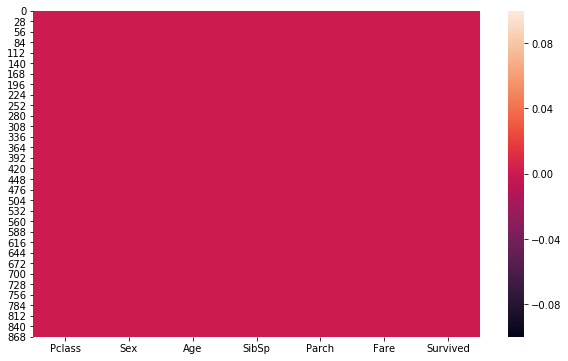

In [18]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.isnull())

Observation: Dataset is cleaned and null values are handled

# Data Visulization and finding patterns and insights

0    549
1    342
Name: Survived, dtype: int64

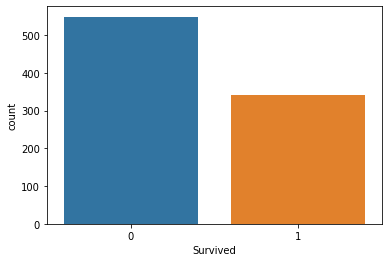

In [19]:
sns.countplot(df.Survived)
df.Survived.value_counts()

In [20]:
No=round((df.Survived.value_counts()[0]/df.shape[0])*100,2)
yes=round((df.Survived.value_counts()[1]/df.shape[0])*100,2)
print("The number of survivers are: ",yes,"% and those who lost lives is: ",No,"%")

The number of survivers are:  38.38 % and those who lost lives is:  61.62 %


Observation: Out of 891 passenger 549 passengers did not survive and rest 342 did

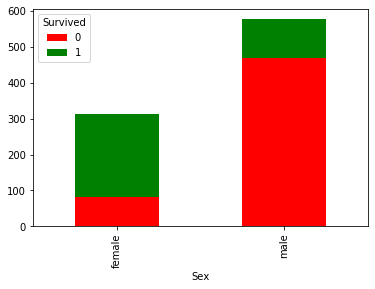

In [21]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', stacked=True, color='rg')

Observation: The number of male passengers is higher than female and the life lost also reflects the same

([<matplotlib.patches.Wedge at 0x276abeeda48>,
 [Text(-0.1916903641021052, 1.1845905639968617, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.11181937905956135, 0.6910111623315025, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

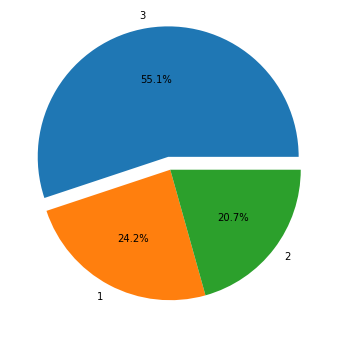

In [22]:
plt.subplots(figsize=(6,6))
plt.pie(df.Pclass.value_counts(), autopct='%1.1f%%', explode=[0.1,0,0], labels=[3,1,2])

Observation: 55.1% belongs to Passenger class 3 which is the 3rd class seats.

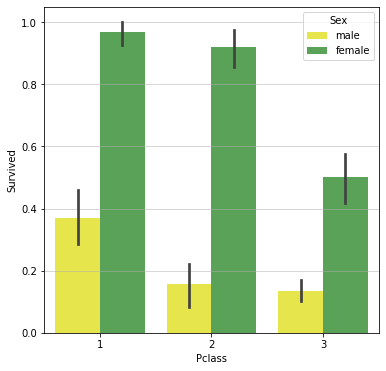

In [39]:
plt.subplots(figsize=(6,6))
plt.grid(True, linewidth=0.5, linestyle='-')
sns.barplot(df.Pclass,df.Survived,hue=df.Sex, palette='Set1_r')

Inference: There are many male passengers travelling in PClass 3 than any other class and gender

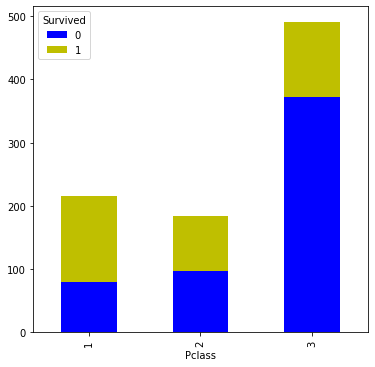

In [23]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar', stacked=True, color='by', figsize=(6,6))

Observation: Maximum number of lives lost was from Pclass 3.

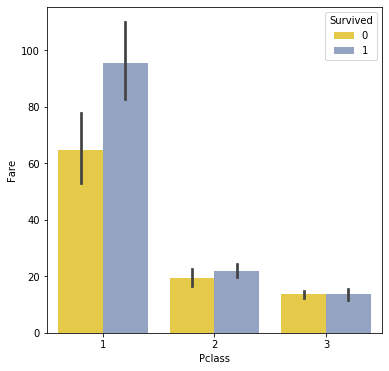

In [24]:
plt.subplots(figsize=(6,6))
sns.barplot(df.Pclass,df.Fare, palette='Set2_r', hue=df.Survived)

Observation: Maximum Pclass 1 were survived as they had paid high for their tickets and safety but Pclass 3 had to face the consequences of tragedy

In [25]:
df.Pclass=df.Pclass.astype(object)
#df.Survived=df.Survived.astype(int)

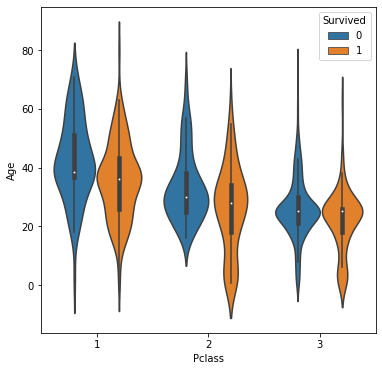

In [26]:
plt.subplots(figsize=(6,6))
sns.violinplot(df.Pclass,df.Age, hue=df.Survived)

Observation: Most of the passengers aged between 20 and 40 are from Passenger class 3 and life lost was also from same age group

# Scaling and finding few patterns

In [27]:
df.Sex=df.Sex.map({'male':0,'female':1})
df.rename({'Sex':'Female'},axis=1, inplace =True)
df.head()

,Pclass,Female,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


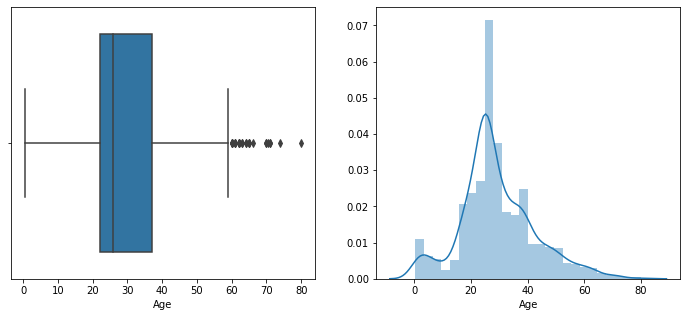

In [28]:
fig, ax= plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df.Age, ax=ax[0])
sns.distplot(df.Age, ax=ax[1])

#### observation: There are outliers in Age feature and is slightly right skewed.

In [29]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Observation : children travelling with nanny are more.

Inference: As there are only 0 to 6 categories and test data includes 9 as category, that info has been included in data set

In [30]:
df.shape

(891, 7)

In [31]:
parch9=pd.read_csv('parch9.csv')
parch9.drop(['Unnamed: 0'], axis=1, inplace=True)
parch9

,Pclass,Female,Age,SibSp,Parch,Fare,Survived
0,3,0,27.0,1,9,69.55,0
1,3,1,27.0,1,9,69.55,1


In [32]:
df=pd.concat((df,parch9), axis=0)
df.shape

(893, 7)

In [33]:
df.SibSp.value_counts()

0    608
1    211
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Observation: More number of people with no relatives

### Creating dummies for  features

In [34]:
for i in ['Pclass','SibSp', 'Parch']:
    df=pd.get_dummies(df,prefix=i, columns=[i], drop_first=True)
    
df.head()

,Female,Age,Fare,Survived,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,22.0,7.2500,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 1
Data columns (total 19 columns):
Female      893 non-null int64
Age         893 non-null float64
Fare        893 non-null float64
Survived    893 non-null int64
Pclass_2    893 non-null uint8
Pclass_3    893 non-null uint8
SibSp_1     893 non-null uint8
SibSp_2     893 non-null uint8
SibSp_3     893 non-null uint8
SibSp_4     893 non-null uint8
SibSp_5     893 non-null uint8
SibSp_8     893 non-null uint8
Parch_1     893 non-null uint8
Parch_2     893 non-null uint8
Parch_3     893 non-null uint8
Parch_4     893 non-null uint8
Parch_5     893 non-null uint8
Parch_6     893 non-null uint8
Parch_9     893 non-null uint8
dtypes: float64(2), int64(2), uint8(15)
memory usage: 48.0 KB


# Model creation

### Importing algorithms

In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
x=df.drop(['Survived'], axis=1)
y=df.Survived

### Splitting the dataset

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=1)
print(X_train.shape)

(714, 18)


### Logistic Regression

In [69]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(confusion_matrix(y_test,lr.predict(X_test)))
print("train accurace:", accuracy_score(y_train,lr.predict(X_train)))
print("test accurace:", accuracy_score(y_test,lr.predict(X_test)))
print()
print(classification_report(y_test,lr.predict(X_test)))
Logisticregression=accuracy_score(y_train,lr.predict(X_train))
Logisticregression_test=accuracy_score(y_test,lr.predict(X_test))

[[85 11]
 [27 56]]
train accurace: 0.8249299719887955
test accurace: 0.7877094972067039

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        96
           1       0.84      0.67      0.75        83

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.79      0.79      0.78       179



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Observation: Accuracy of model is 78.7% while prediction

### Decision Tree

In [102]:
dt=DecisionTreeClassifier(criterion='gini',  random_state=1)
dt.fit(X_train,y_train)
print(confusion_matrix(y_test,dt.predict(X_test)))
print("train accurace:", accuracy_score(y_train,dt.predict(X_train)))
print("test accurace:", accuracy_score(y_test,dt.predict(X_test)))
print()
print(classification_report(y_test,dt.predict(X_test)))
DecisionTree=accuracy_score(y_train,dt.predict(X_train))
DecisionTree_test= accuracy_score(y_test,dt.predict(X_test))

[[81 15]
 [36 47]]
train accurace: 0.9845938375350141
test accurace: 0.7150837988826816

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        96
           1       0.76      0.57      0.65        83

    accuracy                           0.72       179
   macro avg       0.73      0.71      0.70       179
weighted avg       0.72      0.72      0.71       179



#### Observation: Model shows 97.9% accuracy in train, which may seem over fitting with high Bias error

### Grid search method

In [49]:
parameters={'criterion': ['gini','entropy'],
           'max_depth': range(1,20),
           'min_samples_leaf': range(5,100,5),
           'min_samples_split':range(5,100,5)}
dt_grid=DecisionTreeClassifier(random_state=1)
dt_grid_model=GridSearchCV(dt_grid, param_grid=parameters,cv=5, scoring='accuracy')
dt_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(5, 100, 5),
                         'min_samples_split': range(5, 100, 5)},
             scoring='accuracy')

In [50]:
dt_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [71]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9, min_samples_leaf=5, min_samples_split=5, random_state=1)
dt.fit(X_train,y_train)
print(confusion_matrix(y_test,dt.predict(X_test)))
print("train accurace:", accuracy_score(y_train,dt.predict(X_train)))
print("test accurace:", accuracy_score(y_test,dt.predict(X_test)))
print()
print(classification_report(y_test,dt.predict(X_test)))
GridDecisionTree=accuracy_score(y_train,dt.predict(X_train))
GridDecisionTree_test= accuracy_score(y_test,dt.predict(X_test))

[[84 12]
 [33 50]]
train accurace: 0.8921568627450981
test accurace: 0.7486033519553073

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        96
           1       0.81      0.60      0.69        83

    accuracy                           0.75       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.75      0.74       179



#### Observation: Model shows 74.86%.

### Random Forest

In [52]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print(confusion_matrix(y_test,rf.predict(X_test)))
print("train accurace:", accuracy_score(y_train,rf.predict(X_train)))
print("test accurace:", accuracy_score(y_test,rf.predict(X_test)))
print()
print(classification_report(y_test,rf.predict(X_test)))
RandomForest=accuracy_score(y_train,rf.predict(X_train))
RandomForest_test=accuracy_score(y_test,rf.predict(X_test))

[[86 10]
 [30 53]]
train accurace: 0.9845938375350141
test accurace: 0.776536312849162

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        96
           1       0.84      0.64      0.73        83

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.77       179



#### Observation: Model shows 97.9% accuracy, which may seem over fitting with high Bias error

### Grid search method

In [80]:
parameters={'criterion': ['gini','entropy'],
           'max_depth': range(1,20),
            'n_estimators': range(1,20),
           'bootstrap':[True, False]}
rf_grid=RandomForestClassifier(random_state=1)
rf_grid_model=GridSearchCV(rf_grid, param_grid=parameters,cv=5, scoring='accuracy')
rf_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'n_estimators': range(1, 20)},
             scoring='accuracy')

In [81]:
rf_grid_model.best_params_

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 8}

In [82]:
rf=RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=8, bootstrap=False)
rf.fit(X_train,y_train)
print(confusion_matrix(y_test,rf.predict(X_test)))
print("train accurace:", accuracy_score(y_train,rf.predict(X_train)))
print("test accurace:", accuracy_score(y_test,rf.predict(X_test)))
print()
print(classification_report(y_test,rf.predict(X_test)))
GridRandomForest=accuracy_score(y_train,rf.predict(X_train))
GridRandomForest_test=accuracy_score(y_test,rf.predict(X_test))

[[88  8]
 [38 45]]
train accurace: 0.8977591036414566
test accurace: 0.7430167597765364

              precision    recall  f1-score   support

           0       0.70      0.92      0.79        96
           1       0.85      0.54      0.66        83

    accuracy                           0.74       179
   macro avg       0.77      0.73      0.73       179
weighted avg       0.77      0.74      0.73       179



#### Observation: Model shows 74.87% accuracy

### KNN

In [58]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print(confusion_matrix(y_test,knn.predict(X_test)))
print("train accurace:", accuracy_score(y_train,knn.predict(X_train)))
print("test accurace:", accuracy_score(y_test,knn.predict(X_test)))
print()
print(classification_report(y_test,knn.predict(X_test)))
KNN=accuracy_score(y_train,knn.predict(X_train))
KNN_test=accuracy_score(y_test,knn.predict(X_test))

[[80 16]
 [36 47]]
train accurace: 0.7955182072829131
test accurace: 0.7094972067039106

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        96
           1       0.75      0.57      0.64        83

    accuracy                           0.71       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.72      0.71      0.70       179



#### Observation: Model shows 79.55% accuracy. 

### Grid search method

In [59]:
parameters={'n_neighbors':range(1,25)}
knn_grid=KNeighborsClassifier()
knn_grid_model=GridSearchCV(knn_grid, param_grid=parameters,cv=5, scoring='accuracy')
knn_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)}, scoring='accuracy')

In [60]:
knn_grid_model.best_params_

{'n_neighbors': 15}

In [61]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
print(confusion_matrix(y_test,knn.predict(X_test)))
print("train accurace:", accuracy_score(y_train,knn.predict(X_train)))
print("test accurace:", accuracy_score(y_test,knn.predict(X_test)))
print()
print(classification_report(y_test,knn.predict(X_test)))
GridKNN=accuracy_score(y_train,knn.predict(X_train))
GridKNN_test=accuracy_score(y_test,knn.predict(X_test))

[[82 14]
 [47 36]]
train accurace: 0.7478991596638656
test accurace: 0.659217877094972

              precision    recall  f1-score   support

           0       0.64      0.85      0.73        96
           1       0.72      0.43      0.54        83

    accuracy                           0.66       179
   macro avg       0.68      0.64      0.64       179
weighted avg       0.67      0.66      0.64       179



#### Observation: Model shows 65% accuracy which is less than other algorithms 

# Bagging

In [62]:
lr_bag=BaggingClassifier(lr, n_estimators=10, random_state=1)
lr_bag.fit(X_train,y_train)
knn_bag=BaggingClassifier(knn, n_estimators=10, random_state=1)
knn_bag.fit(X_train,y_train)
dt_bag=BaggingClassifier(n_estimators=10, random_state=1)
dt_bag.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

BaggingClassifier(random_state=1)

In [74]:
print('lr bagging:', lr_bag.score(X_train,y_train))
print('knn bagging:', knn_bag.score(X_train,y_train))
print('dt bagging:', dt_bag.score(X_train,y_train))
print('lr bagging test:', lr_bag.score(X_test,y_test))
print('knn bagging test:', knn_bag.score(X_test,y_test))
print('dt bagging test:', dt_bag.score(X_test,y_test))

BaggingLogisticRegression=lr_bag.score(X_train,y_train)
BaggingKNN=knn_bag.score(X_train,y_train)
BaggingDecisionTree=dt_bag.score(X_train,y_train)
BaggingLogisticRegression_test=lr_bag.score(X_test,y_test)
BaggingKNN_test=knn_bag.score(X_test,y_test)
BaggingDecisionTree_test=dt_bag.score(X_test,y_test)

lr bagging: 0.8249299719887955
knn bagging: 0.7521008403361344
dt bagging: 0.969187675070028
lr bagging test: 0.776536312849162
knn bagging test: 0.6759776536312849
dt bagging test: 0.7374301675977654


# Boosting

### Ada 

In [92]:
lr_boos=AdaBoostClassifier(base_estimator=lr, n_estimators=8, random_state=1)
lr_boos.fit(X_train,y_train)
ran_boos=AdaBoostClassifier(base_estimator=rf, n_estimators=8)
ran_boos.fit(X_train,y_train)
dt_boos=AdaBoostClassifier(n_estimators=20, random_state=8)
dt_boos.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20, random_state=8)

In [93]:
print('lr boosting:', lr_boos.score(X_train,y_train))
print('randomforest boosting:', ran_boos.score(X_train,y_train))
print('dt boosting:', dt_boos.score(X_train,y_train))
print('lr boosting test:', lr_boos.score(X_test,y_test))
print('randomforest boosting test:', ran_boos.score(X_test,y_test))
print('dt boosting test:', dt_boos.score(X_test,y_test))

AdaLogisticRegression=lr_boos.score(X_train,y_train)
AdaRandomForest=ran_boos.score(X_train,y_train)
AdaDecisionTree=dt_boos.score(X_train,y_train)
AdaLogisticRegression_test=lr_boos.score(X_test,y_test)
AdaRandomForest_test=ran_boos.score(X_test,y_test)
AdaDecisionTree_test=dt_boos.score(X_test,y_test)

lr boosting: 0.7703081232492998
randomforest boosting: 0.957983193277311
dt boosting: 0.8179271708683473
lr boosting test: 0.6927374301675978
randomforest boosting test: 0.7877094972067039
dt boosting test: 0.7430167597765364


### Gradient

In [98]:
dt_Gradboos=GradientBoostingClassifier(n_estimators=15, random_state=1)
dt_Gradboos.fit(X_train,y_train)
print('dt Gradient boosting:', dt_Gradboos.score(X_train,y_train))
print('dt Gradient boosting test:', dt_Gradboos.score(X_test,y_test))
GradientBoosting=dt_Gradboos.score(X_train,y_train)
GradientBoosting_test=dt_Gradboos.score(X_test,y_test)

dt Gradient boosting: 0.8613445378151261
dt Gradient boosting test: 0.7318435754189944


# Final Accuracy

In [99]:
Train_Accuracy=[Logisticregression, DecisionTree, GridDecisionTree, RandomForest, GridRandomForest, KNN,GridKNN, BaggingLogisticRegression, BaggingKNN, BaggingDecisionTree, AdaLogisticRegression, AdaRandomForest, AdaDecisionTree, GradientBoosting]
Test_Accuracy=[Logisticregression_test, DecisionTree_test, GridDecisionTree_test, RandomForest_test, GridRandomForest_test, KNN_test,GridKNN_test, BaggingLogisticRegression_test, BaggingKNN_test, BaggingDecisionTree_test, AdaLogisticRegression_test, AdaRandomForest_test, AdaDecisionTree_test, GradientBoosting_test]
index=['Logistic regression', 'Decision Tree',' Grid DecistionTree', 'Random Forest', 'Grid RandomForest','KNN','Grid KNN', 'Bagging LogisticRegression', 'Bagging KNN', 'Bagging DecisionTree','Ada LogisticRegrssion','Ada RandomForest', 'Ada DecisionTree','GradientBoosting']
FinalAccuracy=pd.DataFrame(Train_Accuracy, index=index, columns=['Train Accuracy'])
FinalAccuracy['Test Accuracy']=Test_Accuracy
FinalAccuracy

,Train Accuracy,Test Accuracy
Logistic regression,0.824930,0.787709
Decision Tree,0.984594,0.715084
Grid DecistionTree,0.892157,0.748603
Random Forest,0.984594,0.776536
Grid RandomForest,0.897759,0.743017
KNN,0.795518,0.709497
Grid KNN,0.747899,0.659218
Bagging LogisticRegression,0.824930,0.776536
Bagging KNN,0.752101,0.675978
Bagging DecisionTree,0.969188,0.737430


# Importing cleaned test dataset to predict values

In [76]:
testdf=pd.read_csv('Cleaned_test.csv')
testdf.head()

,Unnamed: 0,Female,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,47.0,7.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,62.0,9.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,27.0,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,22.0,12.2875,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
x.head()

,Female,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
testdf.drop(['Unnamed: 0'], inplace=True, axis=1)
testdf.head()

,Female,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,34.5,7.8292,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,47.0,7.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,62.0,9.6875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,27.0,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,22.0,12.2875,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


### Loading X as test data set and using Random Forest algorithm.

In [103]:
test_x=testdf
rf.predict(test_x)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
array=rf.predict(test_x)
result=pd.DataFrame(array, columns=['Survived'])
result.to_csv('result.csv')